In [1]:
import numpy as np
import seaborn as sns
import sys
import pandas as pd
import matplotlib.pyplot as plt
import wave
import pyaudio
from scipy.io.wavfile import write
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from scipy.signal import butter, lfilter
import noisereduce as nr
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import KFold, cross_val_score
from tqdm.notebook import tqdm_notebook

In [2]:
#Load data
ripe = np.loadtxt('ripe.csv',delimiter=',',dtype=str)
#Load data
ripe_2 = np.loadtxt('ripe_2.csv',delimiter=',',dtype=str)
#Load data
ripe_3 = np.loadtxt('ripe_3.csv',delimiter=',',dtype=str)
#Load data
midripe_1 = np.loadtxt('midripe_1.csv',delimiter=',',dtype=str)
#Load data
midripe_2 = np.loadtxt('midripe_2.csv',delimiter=',',dtype=str)
#Load data
midripe_3 = np.loadtxt('midripe_3.csv',delimiter=',',dtype=str)
#Load data
midripe_4 = np.loadtxt('midripe_4.csv',delimiter=',',dtype=str)
#Load data
unripe_1 = np.loadtxt('unripe_1.csv',delimiter=',',dtype=str)
#Load data
unripe_2 = np.loadtxt('unripe_2.csv',delimiter=',',dtype=str)
#Load data
unripe_3 = np.loadtxt('unripe_3.csv',delimiter=',',dtype=str)
#Load data
unripe_4 = np.loadtxt('unripe_4.csv',delimiter=',',dtype=str)

In [3]:
# Combine data horizontally (next to each other)
combined_data = np.concatenate((ripe, ripe_2, ripe_3, midripe_1, midripe_2, midripe_3, midripe_4, unripe_1, unripe_2, unripe_3, unripe_4), axis=1)

# Process data

# Transpose

In [4]:
combined_data = combined_data.T

In [5]:
combined_data

array([['2.15', '12.79', 'R', ..., '-2266', '-3367', '-3367'],
       ['2.16', '13.19', 'R', ..., '-7728', '-7728', '-7728'],
       ['2.16', '12.68', 'R', ..., '-7601', '-7601', '-7601'],
       ...,
       ['1.01', '7.89', 'U', ..., '-4674', '-4674', '-4674'],
       ['1.01', '7.35', 'U', ..., '-2873', '-2873', '-2873'],
       ['1.01', '7.75', 'U', ..., '-8000', '-8000', '-8000']], dtype='<U6')

In [5]:
# Remove weight and diameter
dataset = np.delete(combined_data,[0,1],1)
print(dataset)

[['R' '3' '6' ... '-2266' '-3367' '-3367']
 ['R' '2' '5' ... '-7728' '-7728' '-7728']
 ['R' '0' '1' ... '-7601' '-7601' '-7601']
 ...
 ['U' '-3' '-5' ... '-4674' '-4674' '-4674']
 ['U' '2' '4' ... '-2873' '-2873' '-2873']
 ['U' '0' '0' ... '-8000' '-8000' '-8000']]


# Split into X and y

In [6]:
y = dataset[:,0]

In [7]:
X = np.delete(dataset,0,1).astype(dtype='<i2')

# Plot Vibration

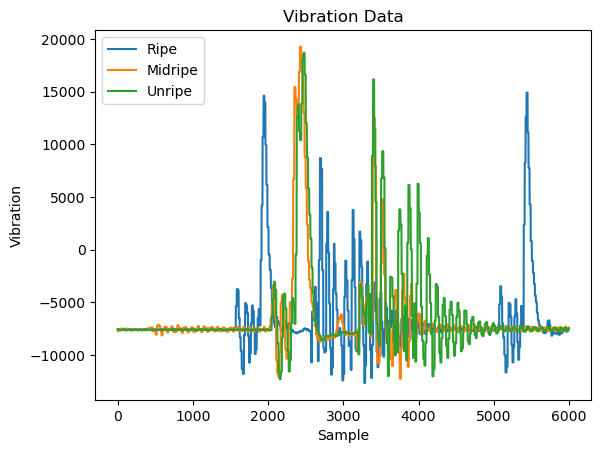

In [9]:
# Plotting the data
plt.plot(X[55,192001:], label='Ripe')
plt.plot(X[185,192001:], label='Midripe')
plt.plot(X[370,192001:], label='Unripe')

# Adding labels and title
plt.xlabel('Sample')
plt.ylabel('Vibration')
plt.title('Vibration Data')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

# Plot Audio

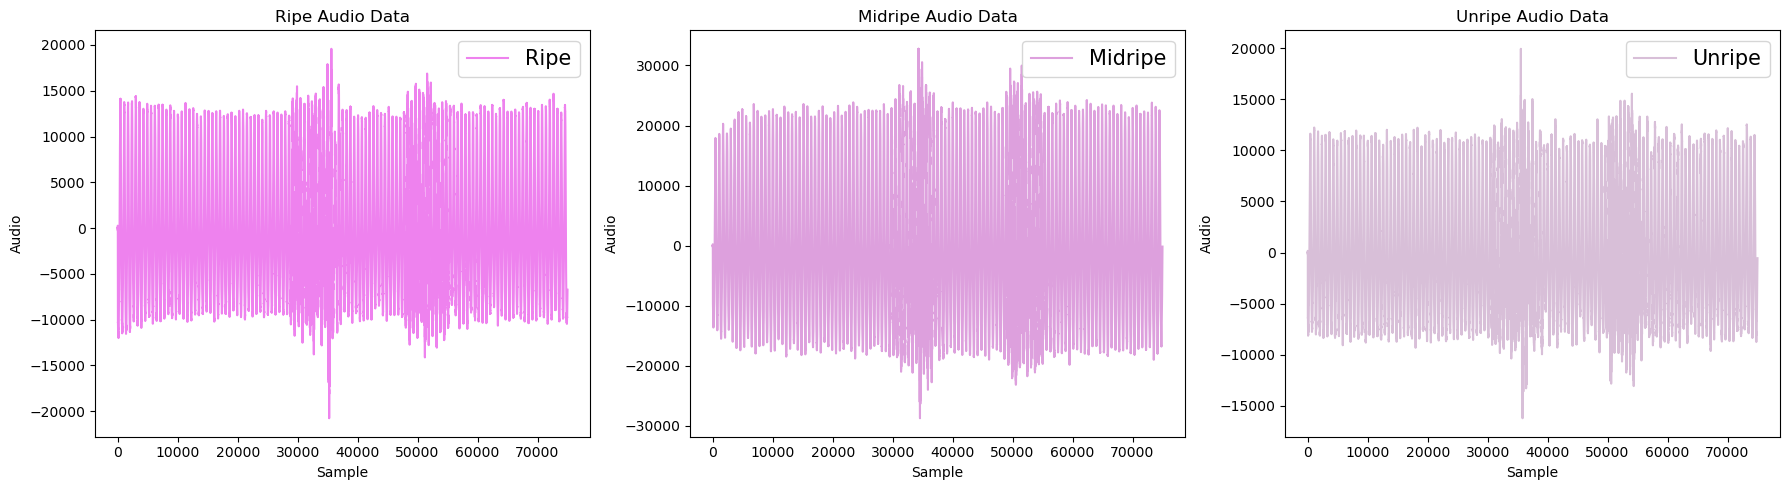

In [55]:
# Plotting the data
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.plot(X[55,:75000].astype(dtype='<i2'), label='Ripe', color='violet')
plt.xlabel('Sample')
plt.ylabel('Audio')
plt.title('Ripe Audio Data')
plt.legend(fontsize="15")

plt.subplot(132)
plt.plot(X[185,:75000].astype(dtype='<i2'), label='Midripe', color = 'plum')
plt.xlabel('Sample')
plt.ylabel('Audio')
plt.title('Midripe Audio Data')
plt.legend(fontsize="15")

plt.subplot(133)
plt.plot(X[370,:75000].astype(dtype='<i2'), label='Unripe', color = 'thistle')
plt.xlabel('Sample')
plt.ylabel('Audio')
plt.title('Unripe Audio Data')
plt.legend(fontsize="15")

plt.tight_layout()
plt.show()

# Filtering and Spectral Gating

In [8]:
lowcut = 200  # Lower cutoff frequency
highcut = 10000  # Upper cutoff frequency
fs = 32000  # Sampling frequency

# Define the Butterworth bandpass filter functions
def butter_bandpass(lowcut, highcut, fs, order=8):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Get the indices of the columns you want to filter
column_indices = np.arange(192000)

# Apply the bandpass filter and noise reduction to the selected columns
X[:, column_indices] = nr.reduce_noise(y=butter_bandpass_filter(X[:, column_indices], lowcut, highcut, fs, order=8), sr=fs, stationary=True, prop_decrease=0.85)


# Train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape,X_test.shape)

(436, 198000) (109, 198000)


# Stop! Training Time

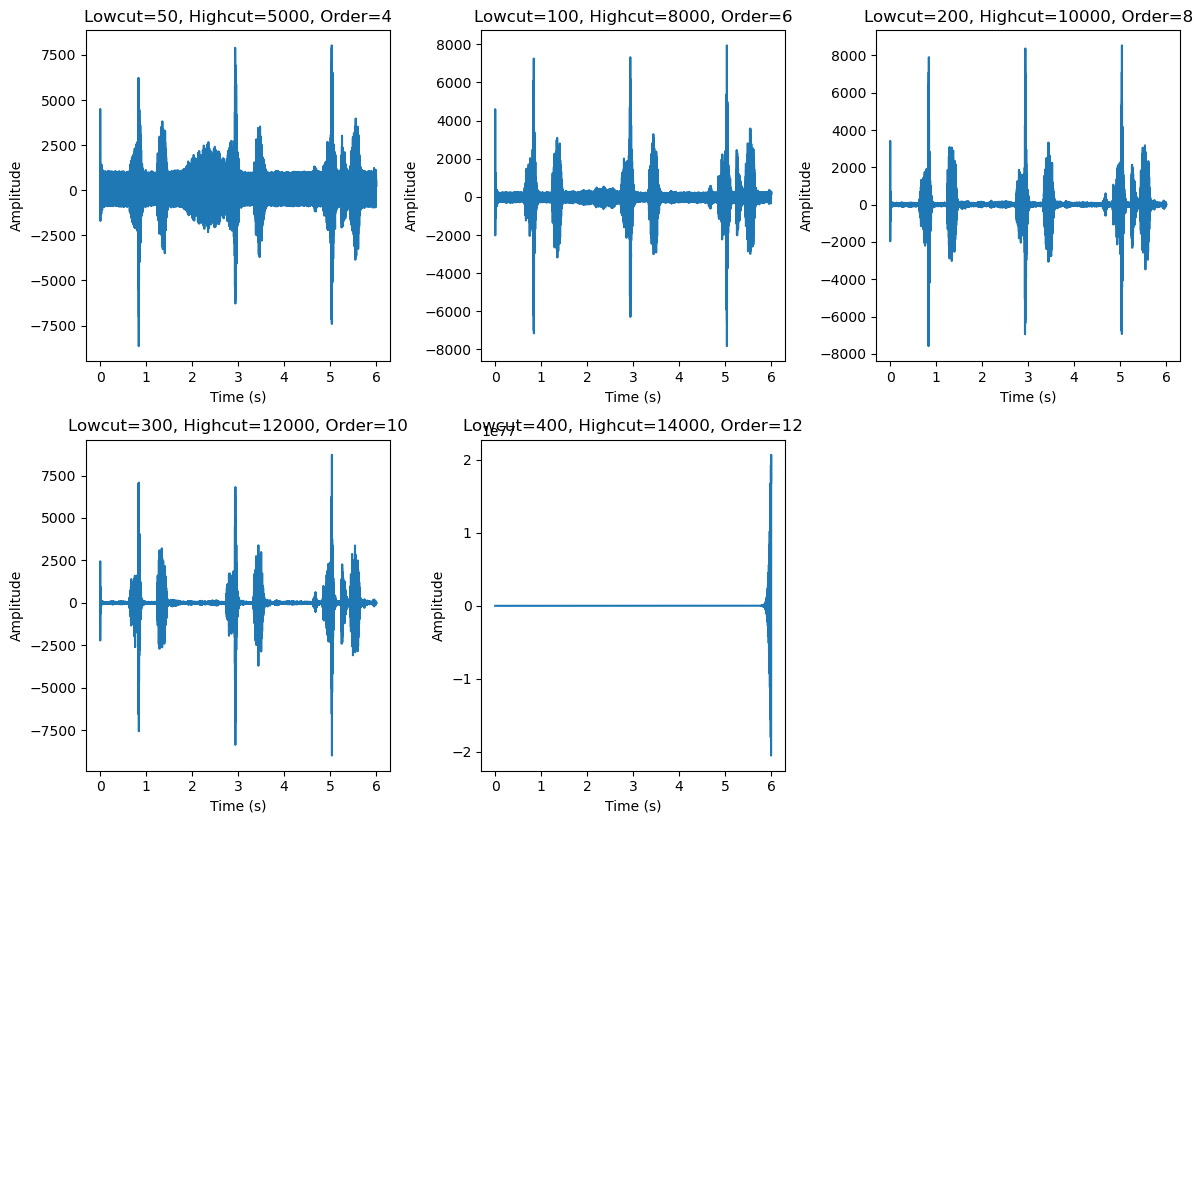

In [6]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile

# Define the Butterworth bandpass filter functions
def butter_bandpass(lowcut, highcut, fs, order=6):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Define your data array X
X = X[50,:192000].astype('<i2')  # Replace ... with your data array

# Set the filter parameters
fs = 32000  # Sampling frequency

# Define the combinations of lowcut, highcut, and order values to compare
parameter_combinations = [
    {'lowcut': 50, 'highcut': 5000, 'order': 4},
    {'lowcut': 100, 'highcut': 8000, 'order': 6},
    {'lowcut': 200, 'highcut': 10000, 'order': 8},
    {'lowcut': 300, 'highcut': 12000, 'order': 10},
    {'lowcut': 400, 'highcut': 14000, 'order': 12}
]

# Create a grid-like arrangement for the plots and file saving
num_plots = len(parameter_combinations)
grid_size = int(np.ceil(np.sqrt(num_plots)))

fig, axs = plt.subplots(grid_size, grid_size, figsize=(12, 12))
axs = axs.flatten()

for i, params in enumerate(parameter_combinations):
    lowcut = params['lowcut']
    highcut = params['highcut']
    order = params['order']

    # Apply the bandpass filter to the data
    filtered_data = butter_bandpass_filter(X, lowcut, highcut, fs, order)
    filtered_data = nr.reduce_noise(filtered_data,sr=fs, stationary=True, prop_decrease=0.85)
    # Save the filtered signal as a WAV file
    filename = f'filtered_signal_{lowcut}-{highcut}_order{order}.wav'
    wavfile.write(filename, fs, filtered_data.astype(np.int16))

    # Plot the filtered signal
    t = np.arange(len(X)) / fs  # Time axis in seconds
    axs[i].plot(t, filtered_data)
    axs[i].set_title(f'Lowcut={lowcut}, Highcut={highcut}, Order={order}')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Amplitude')


# Hide any unused subplots
for j in range(num_plots, grid_size**2):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [5]:
len(np.arange(0.01,1.01,0.01))

100

# 'lowcut': 200, 'highcut': 10000, 'order': 8

# Change hidden layer

In [10]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_hidden_layer = pd.DataFrame(columns=['Hidden_layer', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
hidden_layer_sizes_list = [
    (50,),
    (100,),
    (25, 25),
    (50, 50),
    (100, 50),
    (100, 100),
    (50, 25, 10),
    (50, 50, 25),
    (100, 50, 25),
    (100, 50, 50)
]
for hidden_layer in tqdm_notebook(hidden_layer_sizes_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= hidden_layer, alpha = 0.001, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    current_result = pd.DataFrame({'Hidden_layer': [hidden_layer], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_hidden_layer = pd.concat([results_hidden_layer, current_result], ignore_index=True)
results_hidden_layer

  0%|          | 0/10 [00:00<?, ?it/s]

,Hidden_layer,Train Accuracy,Test Accuracy,CrossValMean
0,"(50,)",0.438073,0.284404,0.236697
1,"(100,)",1.000000,0.669725,0.247706
2,"(25, 25)",1.000000,0.541284,0.405505
3,"(50, 50)",0.997706,0.660550,0.343119
4,"(100, 50)",1.000000,0.541284,0.343119
5,"(100, 100)",1.000000,0.706422,0.473394
6,"(50, 25, 10)",1.000000,0.678899,0.335780
7,"(50, 50, 25)",1.000000,0.651376,0.405505
8,"(100, 50, 25)",1.000000,0.577982,0.411009
9,"(100, 50, 50)",1.000000,0.669725,0.444037


# Change Alpha 

In [10]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_alpha = pd.DataFrame(columns=['Alpha', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
for alpha in tqdm_notebook([0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35]):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,100), alpha = alpha, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    alpha_result = pd.DataFrame({'Alpha': [alpha], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_alpha = pd.concat([results_alpha, alpha_result], ignore_index=True)
results_alpha

  0%|          | 0/10 [00:00<?, ?it/s]

,Alpha,Train Accuracy,Test Accuracy,CrossValMean
0,0.001,1.0,0.706422,0.473394
1,0.005,1.0,0.733945,0.381651
2,0.010,1.0,0.706422,0.436697
3,0.050,1.0,0.706422,0.445872
4,0.100,1.0,0.752294,0.379817
5,0.150,1.0,0.688073,0.425688
6,0.200,1.0,0.651376,0.366972
7,0.250,1.0,0.669725,0.412844
8,0.300,1.0,0.660550,0.453211
9,0.350,1.0,0.660550,0.467890


# Change Max iterations

In [11]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_max_iter = pd.DataFrame(columns=['Max_Iter', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
max_iter_list = [
    200,
    400,
    800,
    1000,
    1200,
    1400,
    1600,
    1800,
    2000,
    2200,
    2400,
    2600,
    2800,
    3000,
    3200,
    3400,
    3600,
    3800,
    4000,
    4200,
    4400,
    4600,
    4800,
    5000,
    5200,
    5400,
    5600,
    5800,
    6000
]
for max_iter in tqdm_notebook(max_iter_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= (100, 100), alpha = 0.001, max_iter=max_iter, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    current_result = pd.DataFrame({'Max_Iter': [max_iter], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_max_iter = pd.concat([results_max_iter, current_result], ignore_index=True)
results_max_iter

  0%|          | 0/29 [00:00<?, ?it/s]

,Max_Iter,Train Accuracy,Test Accuracy,CrossValMean
0,200,1.0,0.706422,0.473394
1,400,1.0,0.706422,0.473394
2,800,1.0,0.706422,0.473394
3,1000,1.0,0.706422,0.473394
4,1200,1.0,0.706422,0.473394
5,1400,1.0,0.706422,0.473394
6,1600,1.0,0.706422,0.473394
7,1800,1.0,0.706422,0.473394
8,2000,1.0,0.706422,0.473394
9,2200,1.0,0.706422,0.473394


In [11]:
from sklearn.metrics import confusion_matrix
# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100), alpha = 0.001, max_iter=2000, random_state=42)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = mlp.predict(X_test)

# Evaluate the model performance
accuracy = mlp.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test,y_pred)
print(cm)

# Save the trained model using pickle
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp, file)

Accuracy: 0.7064220183486238
[[11  8  8]
 [ 7 35  2]
 [ 5  2 31]]


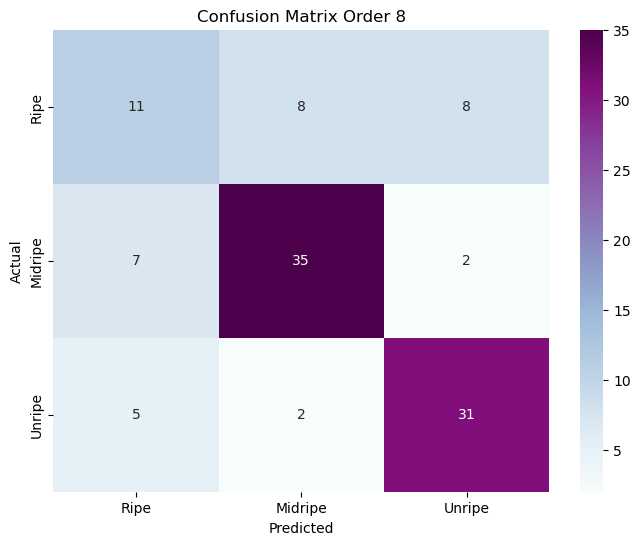

In [15]:
# Confusion matrix data
confusion_matrix = np.array([[11, 8, 8],
                             [7, 35, 2],
                             [5, 2, 31]])

# Define class labels
class_labels = ["Ripe", "Midripe", "Unripe"]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="BuPu", fmt="d", xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Order 8")

# Display the plot
plt.show()

# Just Sound

In [5]:
# Remove weight and diameter
dataset_sound = np.delete(combined_data,[0,1],1)
dataset_sound = dataset_sound[:,:192000]
print(dataset_sound.shape)

(545, 192000)


In [6]:
y = dataset_sound[:,0]
X = np.delete(dataset_sound,0,1).astype(dtype='<i2')

In [7]:
lowcut = 200  # Lower cutoff frequency
highcut = 10000  # Upper cutoff frequency
fs = 32000  # Sampling frequency

# Define the Butterworth bandpass filter functions
def butter_bandpass(lowcut, highcut, fs, order=8):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Get the indices of the columns you want to filter
column_indices = np.arange(192000)

# Apply the bandpass filter and noise reduction to the selected columns
X = nr.reduce_noise(y=butter_bandpass_filter(X, lowcut, highcut, fs, order=8), sr=fs, stationary=True, prop_decrease=0.85)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train,X_test)
print(X_train.shape,X_test.shape)

(436, 191999) (109, 191999)


In [9]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_alpha = pd.DataFrame(columns=['Alpha', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
for alpha in tqdm_notebook([0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35]):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,100), alpha = alpha, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    alpha_result = pd.DataFrame({'Alpha': [alpha], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_alpha = pd.concat([results_alpha, alpha_result], ignore_index=True)
results_alpha

  0%|          | 0/10 [00:00<?, ?it/s]

,Alpha,Train Accuracy,Test Accuracy,CrossValMean
0,0.001,0.997706,0.394495,0.355963
1,0.005,0.997706,0.394495,0.330275
2,0.010,0.997706,0.394495,0.326606
3,0.050,0.997706,0.422018,0.328440
4,0.100,0.997706,0.422018,0.346789
5,0.150,0.997706,0.422018,0.343119
6,0.200,0.997706,0.422018,0.326606
7,0.250,0.997706,0.422018,0.322936
8,0.300,0.997706,0.422018,0.326606
9,0.350,0.993119,0.403670,0.328440


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_hidden_layer = pd.DataFrame(columns=['Hidden Layer', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
hidden_layer_sizes_list = [
    (50,),
    (100,),
    (25, 25),
    (50, 50),
    (100, 50),
    (100, 100),
    (50, 25, 10),
    (50, 50, 25),
    (100, 50, 25),
    (100, 50, 50)
]
for hidden_layer in tqdm_notebook(hidden_layer_sizes_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, alpha = 0.1, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    hidden_layer_result = pd.DataFrame({'Hidden Layer': [hidden_layer], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_hidden_layer = pd.concat([results_hidden_layer, hidden_layer_result], ignore_index=True)
results_hidden_layer

In [11]:
results_hidden_layer

,Hidden Layer,Train Accuracy,Test Accuracy,CrossValMean
0,"(50,)",1.000000,0.412844,0.306422
1,"(100,)",1.000000,0.376147,0.308257
2,"(25, 25)",1.000000,0.385321,0.361468
3,"(50, 50)",1.000000,0.440367,0.311927
4,"(100, 50)",1.000000,0.431193,0.335780
5,"(100, 100)",0.997706,0.422018,0.346789
6,"(50, 25, 10)",0.995413,0.385321,0.260550
7,"(50, 50, 25)",0.997706,0.422018,0.311927
8,"(100, 50, 25)",0.997706,0.449541,0.343119
9,"(100, 50, 50)",1.000000,0.513761,0.341284


In [12]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_max_iter = pd.DataFrame(columns=['Max Iter', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different max iter
max_iter_list = [
    200,
    400,
    800,
    1000,
    1200,
    1400,
    1600,
    1800,
    2000,
    2200,
    2400,
    2600,
    2800,
    3000,
    3200,
    3400,
    3600,
    3800,
    4000,
    4200,
    4400,
    4600,
    4800,
    5000,
    5200,
    5400,
    5600,
    5800,
    6000
]
for max_iter in tqdm_notebook(max_iter_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,50), alpha = 0.1, max_iter=max_iter, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    max_iter_result = pd.DataFrame({'Max_Iter': [max_iter], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_max_iter = pd.concat([results_max_iter, max_iter_result], ignore_index=True)
results_max_iter

  0%|          | 0/29 [00:00<?, ?it/s]

,Max Iter,Train Accuracy,Test Accuracy,CrossValMean,Max_Iter
0,NaN,1.0,0.513761,0.341284,200.0
1,NaN,1.0,0.513761,0.341284,400.0
2,NaN,1.0,0.513761,0.341284,800.0
3,NaN,1.0,0.513761,0.341284,1000.0
4,NaN,1.0,0.513761,0.341284,1200.0
5,NaN,1.0,0.513761,0.341284,1400.0
6,NaN,1.0,0.513761,0.341284,1600.0
7,NaN,1.0,0.513761,0.341284,1800.0
8,NaN,1.0,0.513761,0.341284,2000.0
9,NaN,1.0,0.513761,0.341284,2200.0


# Just Vibration

In [5]:
# Remove weight and diameter
dataset_vibration = np.delete(combined_data,[0,1],1)
dataset_vibration = dataset_vibration[:,192001:]
print(dataset_vibration.shape)

(545, 6000)


In [6]:
y = dataset_vibration[:,0]
X = np.delete(dataset_vibration,0,1).astype(dtype='<i2')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_hidden_layer = pd.DataFrame(columns=['Hidden Layer', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
hidden_layer_sizes_list = [
    (50,),
    (100,),
    (25, 25),
    (50, 50),
    (100, 50),
    (100, 100),
    (50, 25, 10),
    (50, 50, 25),
    (100, 50, 25),
    (100, 50, 50)
]
for hidden_layer in tqdm_notebook(hidden_layer_sizes_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, alpha = 0.1, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    hidden_layer_result = pd.DataFrame({'Hidden Layer': [hidden_layer], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_hidden_layer = pd.concat([results_hidden_layer, hidden_layer_result], ignore_index=True)
results_hidden_layer

  0%|          | 0/10 [00:00<?, ?it/s]

,Hidden Layer,Train Accuracy,Test Accuracy,CrossValMean
0,"(50,)",1.000000,0.018349,0.086239
1,"(100,)",1.000000,0.045872,0.084404
2,"(25, 25)",1.000000,0.036697,0.086239
3,"(50, 50)",1.000000,0.018349,0.108257
4,"(100, 50)",1.000000,0.064220,0.062385
5,"(100, 100)",1.000000,0.027523,0.108257
6,"(50, 25, 10)",0.938073,0.018349,0.086239
7,"(50, 50, 25)",1.000000,0.009174,0.108257
8,"(100, 50, 25)",1.000000,0.018349,0.086239
9,"(100, 50, 50)",1.000000,0.018349,0.099083


In [14]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_alpha = pd.DataFrame(columns=['Alpha', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
for alpha in tqdm_notebook([0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35]):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,100), alpha = alpha, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = cross_val_score(mlp, X, y, cv = k_folds).mean()
    
    # Create a DataFrame for the current results
    alpha_result = pd.DataFrame({'Alpha': [alpha], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_alpha = pd.concat([results_alpha, alpha_result], ignore_index=True)
results_alpha

  0%|          | 0/10 [00:00<?, ?it/s]

,Alpha,Train Accuracy,Test Accuracy,CrossValMean
0,0.001,1.000000,0.036697,0.108257
1,0.005,1.000000,0.009174,0.108257
2,0.010,1.000000,0.045872,0.086239
3,0.050,1.000000,0.027523,0.108257
4,0.100,1.000000,0.027523,0.108257
5,0.150,1.000000,0.018349,0.086239
6,0.200,1.000000,0.018349,0.106422
7,0.250,0.986239,0.027523,0.106422
8,0.300,0.993119,0.018349,0.084404
9,0.350,0.983945,0.055046,0.106422


# 'lowcut': 50, 'highcut': 5000, 'order': 4

In [8]:
lowcut = 50  # Lower cutoff frequency
highcut = 5000  # Upper cutoff frequency
fs = 32000  # Sampling frequency

# Define the Butterworth bandpass filter functions
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Get the indices of the columns you want to filter
column_indices = np.arange(192000)

# Apply the bandpass filter and noise reduction to the selected columns
X[:, column_indices] = nr.reduce_noise(y=butter_bandpass_filter(X[:, column_indices], lowcut, highcut, fs, order=4), sr=fs, stationary=True, prop_decrease=0.85)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Change Hidden Layer

In [10]:
k_folds = KFold(n_splits = 5)
results_hidden_layer = pd.DataFrame(columns=['Hidden_layer', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
hidden_layer_sizes_list = [
    (50,),
    (100,),
    (25, 25),
    (50, 50),
    (100, 50),
    (100, 100),
    (50, 25, 10),
    (50, 50, 25),
    (100, 50, 25),
    (100, 50, 50)
]
for hidden_layer in tqdm_notebook(hidden_layer_sizes_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= hidden_layer, alpha = 0.001, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    current_result = pd.DataFrame({'Hidden_layer': [hidden_layer], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_hidden_layer = pd.concat([results_hidden_layer, current_result], ignore_index=True)
results_hidden_layer

  0%|          | 0/10 [00:00<?, ?it/s]

,Hidden_layer,Train Accuracy,Test Accuracy,CrossValMean
0,"(50,)",0.901376,0.504587,0.374312
1,"(100,)",0.942661,0.568807,0.388991
2,"(25, 25)",0.885321,0.504587,0.355963
3,"(50, 50)",0.931193,0.495413,0.394495
4,"(100, 50)",0.928899,0.532110,0.379817
5,"(100, 100)",1.000000,0.550459,0.335780
6,"(50, 25, 10)",0.839450,0.513761,0.418349
7,"(50, 50, 25)",0.905963,0.477064,0.374312
8,"(100, 50, 25)",0.983945,0.467890,0.317431
9,"(100, 50, 50)",0.832569,0.522936,0.394495


# Change Alpha

In [10]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_alpha = pd.DataFrame(columns=['Alpha', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
for alpha in tqdm_notebook([0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35]):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha = alpha, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    alpha_result = pd.DataFrame({'Alpha': [alpha], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_alpha = pd.concat([results_alpha, alpha_result], ignore_index=True)
results_alpha

  0%|          | 0/10 [00:00<?, ?it/s]

,Alpha,Train Accuracy,Test Accuracy,CrossValMean
0,0.001,0.942661,0.568807,0.388991
1,0.005,0.942661,0.568807,0.388991
2,0.010,0.942661,0.568807,0.388991
3,0.050,0.942661,0.568807,0.388991
4,0.100,0.942661,0.568807,0.388991
5,0.150,0.942661,0.568807,0.388991
6,0.200,0.942661,0.568807,0.388991
7,0.250,0.942661,0.568807,0.388991
8,0.300,0.942661,0.568807,0.387156
9,0.350,0.942661,0.568807,0.390826


# Change Max Iterations

In [11]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_max_iter = pd.DataFrame(columns=['Max_Iter', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
max_iter_list = [
    200,
    400,
    800,
    1000,
    1200,
    1400,
    1600,
    1800,
    2000,
    2200,
    2400,
    2600,
    2800,
    3000,
    3200,
    3400,
    3600,
    3800,
    4000,
    4200,
    4400,
    4600,
    4800,
    5000,
    5200,
    5400,
    5600,
    5800,
    6000
]
for max_iteration in tqdm_notebook(max_iter_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= (100,), alpha = 0.350, max_iter= max_iteration, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    max_iter_result = pd.DataFrame({'Max_Iter': [max_iteration], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_max_iter = pd.concat([results_max_iter, max_iter_result], ignore_index=True)
results_max_iter

  0%|          | 0/29 [00:00<?, ?it/s]

,Max_Iter,Train Accuracy,Test Accuracy,CrossValMean
0,200,0.961009,0.513761,0.33578
1,400,0.961009,0.513761,0.33578
2,800,0.961009,0.513761,0.33578
3,1000,0.961009,0.513761,0.33578
4,1200,0.961009,0.513761,0.33578
5,1400,0.961009,0.513761,0.33578
6,1600,0.961009,0.513761,0.33578
7,1800,0.961009,0.513761,0.33578
8,2000,0.961009,0.513761,0.33578
9,2200,0.961009,0.513761,0.33578


In [10]:
from sklearn.metrics import confusion_matrix
# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha = 0.350, max_iter=2000, random_state=42)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = mlp.predict(X_test)

# Evaluate the model performance
accuracy = mlp.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy: 0.5688073394495413
[[13  7  7]
 [10 28  6]
 [14  3 21]]


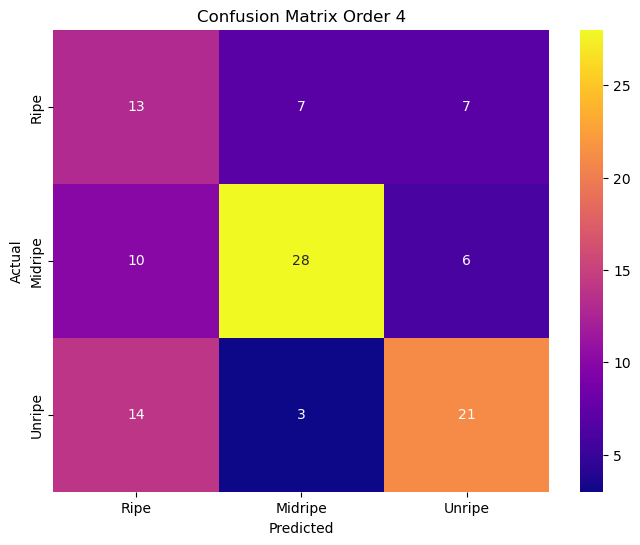

In [18]:
# Confusion matrix data
confusion_matrix = np.array([[13, 7, 7],
                             [10, 28, 6],
                             [14, 3, 21]])

# Define class labels
class_labels = ["Ripe", "Midripe", "Unripe"]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="plasma", fmt="d", xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Order 4")

# Display the plot
plt.show()

# 'lowcut': 100, 'highcut': 8000, 'order': 6

In [9]:
lowcut = 100  # Lower cutoff frequency
highcut = 8000  # Upper cutoff frequency
fs = 32000  # Sampling frequency

# Define the Butterworth bandpass filter functions
def butter_bandpass(lowcut, highcut, fs, order=6):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Get the indices of the columns you want to filter
column_indices = np.arange(192000)

# Apply the bandpass filter and noise reduction to the selected columns
X[:, column_indices] = nr.reduce_noise(y=butter_bandpass_filter(X[:, column_indices], lowcut, highcut, fs, order=6), sr=fs, stationary=True, prop_decrease=0.85)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
k_folds = KFold(n_splits = 5)
results_hidden_layer = pd.DataFrame(columns=['Hidden_layer', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
hidden_layer_sizes_list = [
    (50,),
    (100,),
    (25, 25),
    (50, 50),
    (100, 50),
    (100, 100),
    (50, 25, 10),
    (50, 50, 25),
    (100, 50, 25),
    (100, 50, 50)
]
for hidden_layer in tqdm_notebook(hidden_layer_sizes_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= hidden_layer, alpha = 0.001, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    current_result = pd.DataFrame({'Hidden_layer': [hidden_layer], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_hidden_layer = pd.concat([results_hidden_layer, current_result], ignore_index=True)
results_hidden_layer

  0%|          | 0/10 [00:00<?, ?it/s]

,Hidden_layer,Train Accuracy,Test Accuracy,CrossValMean
0,"(50,)",0.633028,0.376147,0.310092
1,"(100,)",0.970183,0.577982,0.504587
2,"(25, 25)",0.986239,0.440367,0.400000
3,"(50, 50)",1.000000,0.669725,0.449541
4,"(100, 50)",1.000000,0.587156,0.447706
5,"(100, 100)",1.000000,0.633028,0.431193
6,"(50, 25, 10)",1.000000,0.587156,0.405505
7,"(50, 50, 25)",1.000000,0.623853,0.403670
8,"(100, 50, 25)",1.000000,0.651376,0.387156
9,"(100, 50, 50)",1.000000,0.596330,0.434862


In [11]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_alpha = pd.DataFrame(columns=['Alpha', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
for alpha in tqdm_notebook([0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35]):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(50,50), alpha = alpha, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    alpha_result = pd.DataFrame({'Alpha': [alpha], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_alpha = pd.concat([results_alpha, alpha_result], ignore_index=True)
results_alpha

  0%|          | 0/10 [00:00<?, ?it/s]

,Alpha,Train Accuracy,Test Accuracy,CrossValMean
0,0.001,1.000000,0.669725,0.449541
1,0.005,1.000000,0.642202,0.361468
2,0.010,0.997706,0.660550,0.365138
3,0.050,0.995413,0.623853,0.374312
4,0.100,0.997706,0.623853,0.376147
5,0.150,1.000000,0.596330,0.427523
6,0.200,1.000000,0.596330,0.379817
7,0.250,1.000000,0.596330,0.383486
8,0.300,1.000000,0.596330,0.376147
9,0.350,1.000000,0.596330,0.400000


In [12]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_max_iter = pd.DataFrame(columns=['Max_Iter', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
max_iter_list = [
    200,
    1000,
    1600,
    2000,
    2600,
    3000,
    3600,
    4000,
    4600,
    5000,
]
for max_iteration in tqdm_notebook(max_iter_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= (50, 50), alpha = 0.001, max_iter= max_iteration, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    max_iter_result = pd.DataFrame({'Max_Iter': [max_iteration], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_max_iter = pd.concat([results_max_iter, max_iter_result], ignore_index=True)
results_max_iter

  0%|          | 0/10 [00:00<?, ?it/s]

,Max_Iter,Train Accuracy,Test Accuracy,CrossValMean
0,200,1.0,0.669725,0.449541
1,1000,1.0,0.669725,0.449541
2,1600,1.0,0.669725,0.449541
3,2000,1.0,0.669725,0.449541
4,2600,1.0,0.669725,0.449541
5,3000,1.0,0.669725,0.449541
6,3600,1.0,0.669725,0.449541
7,4000,1.0,0.669725,0.449541
8,4600,1.0,0.669725,0.449541
9,5000,1.0,0.669725,0.449541


In [11]:
from sklearn.metrics import confusion_matrix
# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50), alpha = 0.001, max_iter=2000, random_state=42)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = mlp.predict(X_test)

# Evaluate the model performance
accuracy = mlp.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy: 0.6697247706422018
[[15  8  4]
 [ 8 31  5]
 [ 7  4 27]]


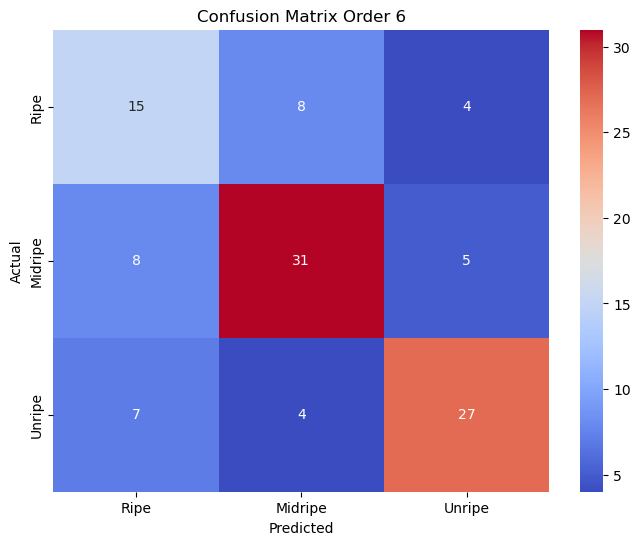

In [22]:
# Confusion matrix data
confusion_matrix = np.array([[15, 8, 4],
                             [8, 31, 5],
                             [7, 4, 27]])

# Define class labels
class_labels = ["Ripe", "Midripe", "Unripe"]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="coolwarm", fmt="d", xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Order 6")

# Display the plot
plt.show()

# 'lowcut': 300, 'highcut': 12000, 'order': 10

In [8]:
lowcut = 300  # Lower cutoff frequency
highcut = 12000  # Upper cutoff frequency
fs = 32000  # Sampling frequency

# Define the Butterworth bandpass filter functions
def butter_bandpass(lowcut, highcut, fs, order=10):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Get the indices of the columns you want to filter
column_indices = np.arange(192000)

# Apply the bandpass filter and noise reduction to the selected columns
X[:, column_indices] = nr.reduce_noise(y=butter_bandpass_filter(X[:, column_indices], lowcut, highcut, fs, order=10), sr=fs, stationary=True, prop_decrease=0.85)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
k_folds = KFold(n_splits = 5)
results_hidden_layer = pd.DataFrame(columns=['Hidden_layer', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
hidden_layer_sizes_list = [
    (50,),
    (100,),
    (25, 25),
    (50, 50),
    (100, 50),
    (100, 100),
    (50, 25, 10),
    (50, 50, 25),
    (100, 50, 25),
    (100, 50, 50)
]
for hidden_layer in tqdm_notebook(hidden_layer_sizes_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= hidden_layer, alpha = 0.001, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    current_result = pd.DataFrame({'Hidden_layer': [hidden_layer], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_hidden_layer = pd.concat([results_hidden_layer, current_result], ignore_index=True)
results_hidden_layer

  0%|          | 0/10 [00:00<?, ?it/s]

,Hidden_layer,Train Accuracy,Test Accuracy,CrossValMean
0,"(50,)",0.678899,0.321101,0.128440
1,"(100,)",1.000000,0.660550,0.326606
2,"(25, 25)",0.981651,0.376147,0.319266
3,"(50, 50)",1.000000,0.422018,0.253211
4,"(100, 50)",1.000000,0.660550,0.335780
5,"(100, 100)",1.000000,0.633028,0.400000
6,"(50, 25, 10)",1.000000,0.688073,0.368807
7,"(50, 50, 25)",1.000000,0.706422,0.330275
8,"(100, 50, 25)",1.000000,0.605505,0.374312
9,"(100, 50, 50)",1.000000,0.577982,0.401835


In [10]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_alpha = pd.DataFrame(columns=['Alpha', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
for alpha in tqdm_notebook([0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35]):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(50,50,25), alpha = alpha, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    alpha_result = pd.DataFrame({'Alpha': [alpha], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_alpha = pd.concat([results_alpha, alpha_result], ignore_index=True)
results_alpha

  0%|          | 0/10 [00:00<?, ?it/s]

,Alpha,Train Accuracy,Test Accuracy,CrossValMean
0,0.001,1.000000,0.706422,0.330275
1,0.005,1.000000,0.651376,0.390826
2,0.010,1.000000,0.623853,0.282569
3,0.050,0.997706,0.596330,0.379817
4,0.100,1.000000,0.678899,0.387156
5,0.150,1.000000,0.688073,0.300917
6,0.200,1.000000,0.678899,0.326606
7,0.250,1.000000,0.596330,0.366972
8,0.300,1.000000,0.660550,0.376147
9,0.350,1.000000,0.678899,0.387156


In [11]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_max_iter = pd.DataFrame(columns=['Max_Iter', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
max_iter_list = [
    200,
    1000,
    1600,
    2000,
    2600,
    3000,
    3600,
    4000,
    4600,
    5000,
]
for max_iteration in tqdm_notebook(max_iter_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= (50, 50, 25), alpha = 0.001, max_iter= max_iteration, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    max_iter_result = pd.DataFrame({'Max_Iter': [max_iteration], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_max_iter = pd.concat([results_max_iter, max_iter_result], ignore_index=True)
results_max_iter

  0%|          | 0/10 [00:00<?, ?it/s]

,Max_Iter,Train Accuracy,Test Accuracy,CrossValMean
0,200,1.0,0.706422,0.330275
1,1000,1.0,0.706422,0.330275
2,1600,1.0,0.706422,0.330275
3,2000,1.0,0.706422,0.330275
4,2600,1.0,0.706422,0.330275
5,3000,1.0,0.706422,0.330275
6,3600,1.0,0.706422,0.330275
7,4000,1.0,0.706422,0.330275
8,4600,1.0,0.706422,0.330275
9,5000,1.0,0.706422,0.330275


In [12]:
from sklearn.metrics import confusion_matrix
# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50,25), alpha = 0.001, max_iter=2000, random_state=42)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = mlp.predict(X_test)

# Evaluate the model performance
accuracy = mlp.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy: 0.7064220183486238
[[ 7  9 11]
 [ 4 38  2]
 [ 3  3 32]]


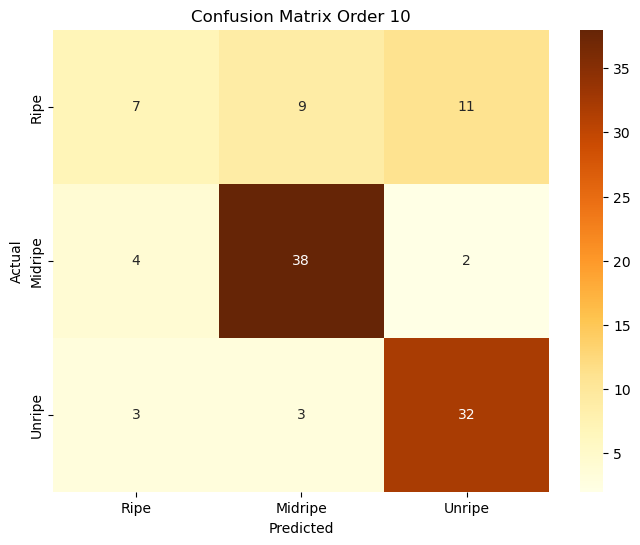

In [16]:
# Confusion matrix data
confusion_matrix = np.array([[7, 9, 11],
                             [4, 38, 2],
                             [3, 3, 32]])

# Define class labels
class_labels = ["Ripe", "Midripe", "Unripe"]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="YlOrBr", fmt="d", xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Order 10")

# Display the plot
plt.show()

# Raw no filter

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
k_folds = KFold(n_splits = 5)
results_hidden_layer = pd.DataFrame(columns=['Hidden_layer', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
hidden_layer_sizes_list = [
    (50,),
    (100,),
    (25, 25),
    (50, 50),
    (100, 50),
    (100, 100),
    (50, 25, 10),
    (50, 50, 25),
    (100, 50, 25),
    (100, 50, 50)
]
for hidden_layer in tqdm_notebook(hidden_layer_sizes_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= hidden_layer, alpha = 0.001, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    current_result = pd.DataFrame({'Hidden_layer': [hidden_layer], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_hidden_layer = pd.concat([results_hidden_layer, current_result], ignore_index=True)
results_hidden_layer

  0%|          | 0/10 [00:00<?, ?it/s]

,Hidden_layer,Train Accuracy,Test Accuracy,CrossValMean
0,"(50,)",0.919725,0.504587,0.326606
1,"(100,)",0.892202,0.550459,0.420183
2,"(25, 25)",0.928899,0.504587,0.400000
3,"(50, 50)",0.915138,0.522936,0.280734
4,"(100, 50)",0.720183,0.495413,0.332110
5,"(100, 100)",0.855505,0.458716,0.299083
6,"(50, 25, 10)",0.864679,0.495413,0.346789
7,"(50, 50, 25)",0.880734,0.513761,0.337615
8,"(100, 50, 25)",0.947248,0.431193,0.277064
9,"(100, 50, 50)",0.779817,0.412844,0.354128


In [10]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_alpha = pd.DataFrame(columns=['Alpha', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
for alpha in tqdm_notebook([0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35]):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,25), alpha = alpha, max_iter=2000, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    alpha_result = pd.DataFrame({'Alpha': [alpha], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_alpha = pd.concat([results_alpha, alpha_result], ignore_index=True)
results_alpha

  0%|          | 0/10 [00:00<?, ?it/s]

,Alpha,Train Accuracy,Test Accuracy,CrossValMean
0,0.001,0.947248,0.431193,0.277064
1,0.005,0.873853,0.394495,0.317431
2,0.010,0.926606,0.458716,0.324771
3,0.050,0.857798,0.458716,0.341284
4,0.100,0.809633,0.449541,0.363303
5,0.150,0.922018,0.504587,0.335780
6,0.200,0.864679,0.477064,0.374312
7,0.250,0.802752,0.467890,0.315596
8,0.300,0.818807,0.495413,0.282569
9,0.350,0.850917,0.467890,0.335780


In [9]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
results_max_iter = pd.DataFrame(columns=['Max_Iter', 'Train Accuracy', 'Test Accuracy','CrossValMean'])
# Define different hidden layer sizes
max_iter_list = [
    200,
    400,
    800,
    1000,
    1200,
    1400,
    1600,
    1800,
    2000,
    2200,
    2400,
    2600,
    2800,
    3000,
    3200,
    3400,
    3600,
    3800,
    4000,
    4200,
    4400,
    4600,
    4800,
    5000,
    5200,
    5400,
    5600,
    5800,
    6000
]
for max_iteration in tqdm_notebook(max_iter_list):
    # Create an instance of the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes= (100, 50, 25), alpha = 0.001, max_iter= max_iteration, random_state=42)
    # Train the MLPClassifier on the training data
    mlp.fit(X_train, y_train)
    # Evaluate the model performance
    accuracy_train = mlp.score(X_train, y_train)
    accuracy_test = mlp.score(X_test, y_test)
    scores = np.mean(cross_val_score(mlp, X, y, cv = k_folds))
    
    # Create a DataFrame for the current results
    max_iter_result = pd.DataFrame({'Max_Iter': [max_iteration], 'Train Accuracy': [accuracy_train], 'Test Accuracy': [accuracy_test], 'CrossValMean': [scores]})
    
    # Concatenate the current results to the main results DataFrame
    results_max_iter = pd.concat([results_max_iter, max_iter_result], ignore_index=True)
results_max_iter

  0%|          | 0/29 [00:00<?, ?it/s]

,Max_Iter,Train Accuracy,Test Accuracy,CrossValMean
0,200,0.947248,0.431193,0.277064
1,400,0.947248,0.431193,0.277064
2,800,0.947248,0.431193,0.277064
3,1000,0.947248,0.431193,0.277064
4,1200,0.947248,0.431193,0.277064
5,1400,0.947248,0.431193,0.277064
6,1600,0.947248,0.431193,0.277064
7,1800,0.947248,0.431193,0.277064
8,2000,0.947248,0.431193,0.277064
9,2200,0.947248,0.431193,0.277064


In [9]:
from sklearn.metrics import confusion_matrix
# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,50,25), alpha = 0.150, max_iter=2000, random_state=42)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = mlp.predict(X_test)

# Evaluate the model performance
accuracy = mlp.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy: 0.5045871559633027
[[14  8  5]
 [13 20 11]
 [ 7 10 21]]


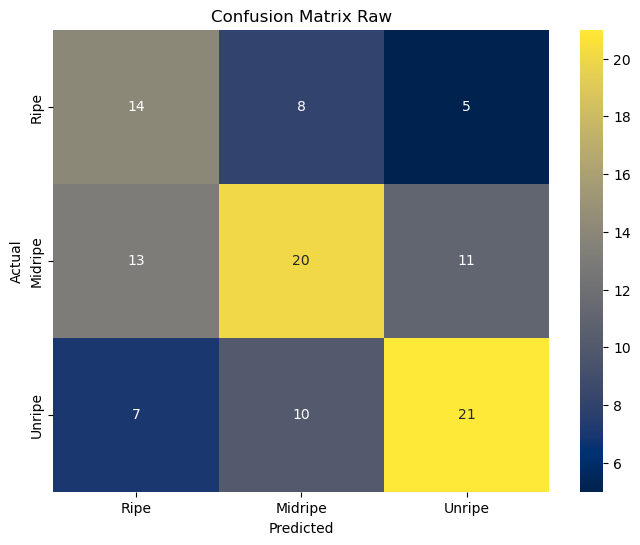

In [17]:
# Confusion matrix data
confusion_matrix = np.array([[14, 8, 5],
                             [13, 20, 11],
                             [7, 10, 21]])

# Define class labels
class_labels = ["Ripe", "Midripe", "Unripe"]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="cividis", fmt="d", xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Raw")

# Display the plot
plt.show()